# NBA 2022 Champion
## NBA league

- There are 30 teams in the NBA league and they are divided into East and West Conference (15 teams on each)

- Each team will play 82 matches in total throughout the entire season

- The top 8 teams from each conference will advance to the playoff according to their win-lose record (the picture below shows the playoff tree)

- Each series will be held in the form of best of 7


<img src= "NBA2022_Playoff.png">

## Task

- There are only 2 teams left playing in the finals today (Golden State Warriors vs Boston Celtics)

- Our task will be predicting if the ```Golden State Warriors``` that is the lead of star player ```Stephen Curry``` will win the series and win championship 

- There is one dataset:
    1. The career stats of Stephen Curry

The dataset is retrieved from https://www.kaggle.com/datasets/mujinjo/stephen-curry-stats-20092021-in-nba. <br>

However, we are going to add another column of boolean value to have True when he won and False when he lost in order to insert the record to the data of our model.

In [1]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import pandas as pd
import statistics as s 
import seaborn as sns
from matplotlib.pyplot import figure

import matplotlib.pyplot as plt
import matplotlib as mpl

## Dataset

### Stephen Curry career stats

In [2]:
Curry_Career = pd.read_csv('Stephen Curry Stats.csv')
Result = Curry_Career['Result']
Result = np.array(Result)
Curry_Career_Record = []

for i in range(len(Result)):
    if Result[i] == 'W':
        Curry_Career_Record.append(1)
    else:
        Curry_Career_Record.append(0)

Curry_Career['Record'] = Curry_Career_Record
Curry_Career.head(10)

,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS,Record
0,2009-2010,Regular,Wed 4/14,POR,W,122,116,48.0,13-25,13,...,12,100.0,9,8,1,2,0,2,42,1
1,2009-2010,Regular,Tue 4/13,UTA,L,94,103,41.0,5-15,5,...,6,100.0,5,6,0,2,4,2,17,0
2,2009-2010,Regular,Sun 4/11,OKC,W,120,117,35.0,9-16,9,...,6,66.7,7,7,0,1,2,5,25,1
3,2009-2010,Regular,Sat 4/10,LAC,L,104,107,41.0,10-19,10,...,4,100.0,9,4,0,3,5,3,29,0
4,2009-2010,Regular,Wed 4/7,MIN,W,116,107,44.0,12-22,12,...,0,0.0,8,14,0,7,4,4,27,1
5,2009-2010,Regular,Tue 4/6,WSH,L,94,112,33.0,10-21,10,...,4,100.0,1,4,0,2,2,2,27,0
6,2009-2010,Regular,Sun 4/4,TOR,W,113,112,44.0,10-23,10,...,6,66.7,8,12,2,3,4,5,29,1
7,2009-2010,Regular,Fri 4/2,NYK,W,128,117,29.0,7-21,7,...,0,0.0,4,10,0,1,1,2,15,1
8,2009-2010,Regular,Wed 3/31,UTA,L,104,128,34.0,6-16,6,...,3,66.7,2,6,0,0,5,4,15,0
9,2009-2010,Regular,Sun 3/28,LAC,W,121,103,40.0,8-15,8,...,0,0.0,4,7,0,1,5,3,18,1


## Models

```Model 1```
- there is one parameters (θ)

- <strong> θ </strong> will be the chance of success (Stephen Curry winning one game)

- <strong> game </strong> will be the result of the game, win(1) or lose(0) using bernoulli distribution and θ will be the argument

- <strong> series </strong> will be the games won out of 7 games using the binomial distribution

- <strong> y </strong> will be the result of the series of best of 7 (1 if he wins 4 games and 0 if less than 4)

- the data that will be used in this model is from the Stephen Curry career stats

```Model 2```
- there are three parameters (α, β and θ)

- <strong> α </strong> and <strong> β </strong> are the first and second arguments of θ's beta distribution

- <strong> θ </strong> will be the chance of success (Stephen Curry winning one game)

- <strong> game </strong> will be the result of the game, win(1) or lose(0) using bernoulli distribution and θ will be the argument

- <strong> series </strong> will be the games won out of 7 games using the binomial distribution

- <strong> y </strong> will be the result of the series of best of 7 (1 if he wins 4 games and 0 if less than 4)

- the data that will be used in this model is from the Stephen Curry career stats

## Prior Predictive Checks - Model 1
```θ, theta```
- This parameter will take the two arguments (α, β)

- Beta distribution will be used as the prior for this parameter

- Stephen Curry started playing in the NBA since 2009, it's around 13 seasons and 1 season has 82 games so we assumed that he played 1000 games

- We would guess that he won around 550 games as he wasn't famous till 2015 so he probably didn't perform great before that

- Therefore, we put α = 550 and β = 450

In [39]:
with open ('model_1_ppc.stan', 'r') as file:
    print(file.read())

generated quantities {
   real theta = beta_rng(550, 450);
   real series = binomial_rng(7, theta);
   real y;
   if (series >= 4.0){
      series = 4;
      y = 1;
   }
   else
      y = 0;
}


In [50]:
model_1_ppc = CmdStanModel(stan_file='model_1_ppc.stan')

model_1_ppc_result = model_1_ppc.sample(iter_sampling=1000,
                        iter_warmup=0,
                        chains=1,
                        fixed_param=True)

model_1_ppc_result.summary()    

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.00,NaN,0.000,0.00,0.00,0.00,NaN,NaN,NaN
theta,0.55,0.0005,0.016,0.52,0.55,0.57,980.0,250000.0,1.0
series,3.40,0.0320,0.860,2.00,4.00,4.00,730.0,180000.0,1.0
y,0.57,0.0180,0.500,0.00,1.00,1.00,770.0,190000.0,1.0


Text(0.5, 1.0, 'y_1_prior')

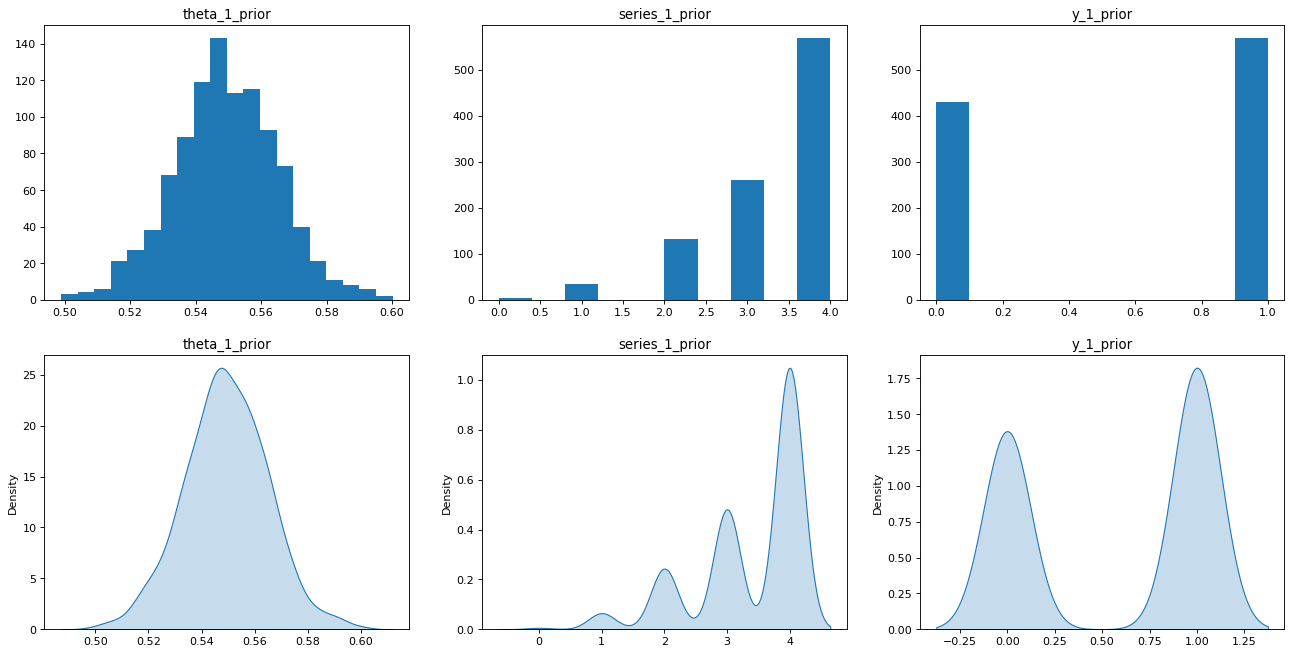

In [52]:
theta_1_prior = model_1_ppc_result.stan_variable('theta')
series_1_prior = model_1_ppc_result.stan_variable('series')
y_1_prior = model_1_ppc_result.stan_variable('y')

figure(figsize=(20, 10), dpi=80)
plt.subplot(2, 3, 1)
plt.hist(theta_1_prior, bins = 20)
plt.title('theta_1_prior')

plt.subplot(2, 3, 2)
plt.hist(series_1_prior, bins = 10)
plt.title('series_1_prior')

plt.subplot(2, 3, 3)
plt.hist(y_1_prior, bins = 10)
plt.title('y_1_prior')

plt.subplot(2, 3, 4)
sns.kdeplot(theta_1_prior, shade = True)
plt.title('theta_1_prior')

plt.subplot(2, 3, 5)
sns.kdeplot(series_1_prior, shade = True)
plt.title('series_1_prior')

plt.subplot(2, 3, 6)
sns.kdeplot(y_1_prior, shade = True)
plt.title('y_1_prior')

### Comments on Prior Predictive Check for Model 1

From the graphs and table of summary shown above, we can see that:

- the parameter (theta) that is simulated from the prior we selected makes sense as we guessed they won 550 out 1000 which is 55% and we have here the mean value of theta_1_prior is 0.55

- for series, we can see that the number of times Stephen Curry won 4 games in a series is more which makes sense as the chance of him winning one game is 55%

- the measurement (y) that is simulated from the prior we selected, we can see that Stephen Curry won more series than lost out of 1000 simulated series, higher density in winning (1) than losing (0) with the mean value of y_1_prior is 0.57

## Posterior Analysis - Model 1

In [56]:
model_1 = CmdStanModel(stan_file = 'model_1.stan')
model_1_fit = model_1.sample(data = {'N': len(Curry_Career_Record), 
                                    'game': Curry_Career_Record}, 
                                    iter_sampling=1000,
                                    iter_warmup=1000,
                                    chains=1,
                                    fixed_param=False)    

model_1_fit.summary()                                    

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-1300.00,0.02600,0.610,-1300.00,-1300.0,-1300.00,540.0,36000.0,1.0
theta,0.60,0.00062,0.011,0.58,0.6,0.62,310.0,20000.0,1.0
y,0.71,0.01500,0.450,0.00,1.0,1.00,970.0,65000.0,1.0
series,3.60,0.02300,0.730,2.00,4.0,4.00,1000.0,66000.0,1.0


Text(0.5, 1.0, 'y_1_model')

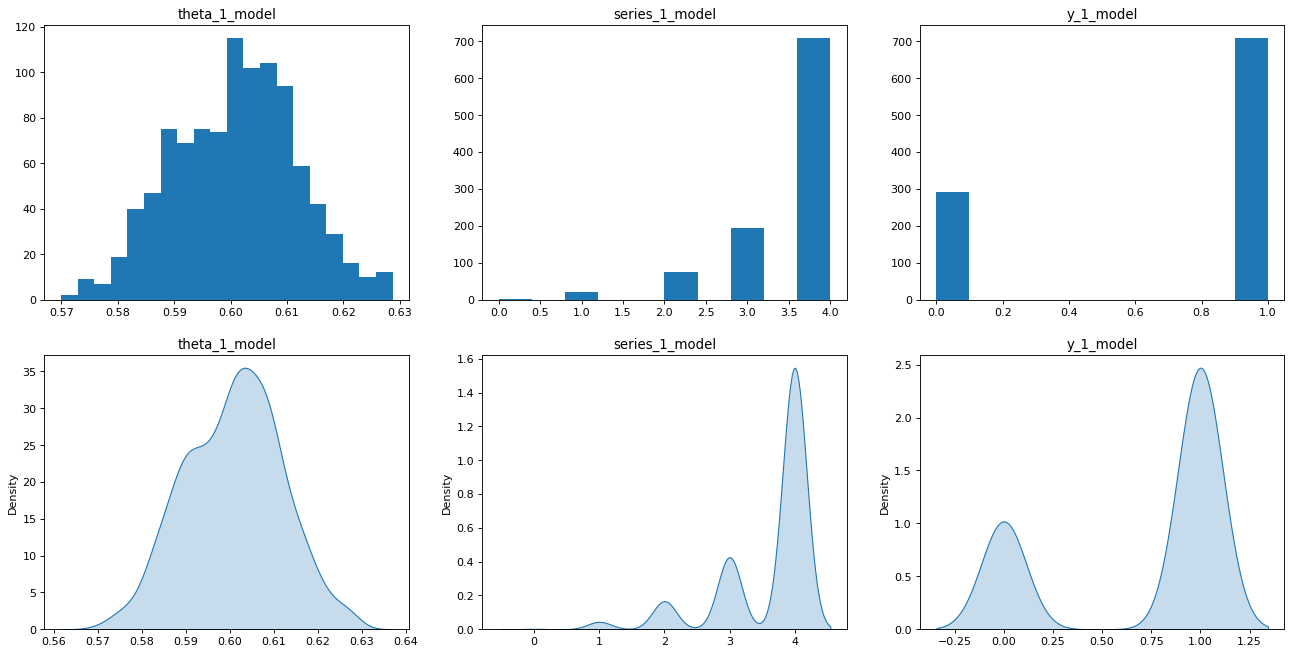

In [57]:
theta_1_model = model_1_fit.stan_variable('theta')
series_1_model = model_1_fit.stan_variable('series')
y_1_model = model_1_fit.stan_variable('y')

figure(figsize=(20, 10), dpi=80)
plt.subplot(2, 3, 1)
plt.hist(theta_1_model, bins = 20)
plt.title('theta_1_model')

plt.subplot(2, 3, 2)
plt.hist(series_1_model, bins = 10)
plt.title('series_1_model')

plt.subplot(2, 3, 3)
plt.hist(y_1_model, bins = 10)
plt.title('y_1_model')

plt.subplot(2, 3, 4)
sns.kdeplot(theta_1_model, shade = True)
plt.title('theta_1_model')

plt.subplot(2, 3, 5)
sns.kdeplot(series_1_model, shade = True)
plt.title('series_1_model')

plt.subplot(2, 3, 6)
sns.kdeplot(y_1_model, shade = True)
plt.title('y_1_model')

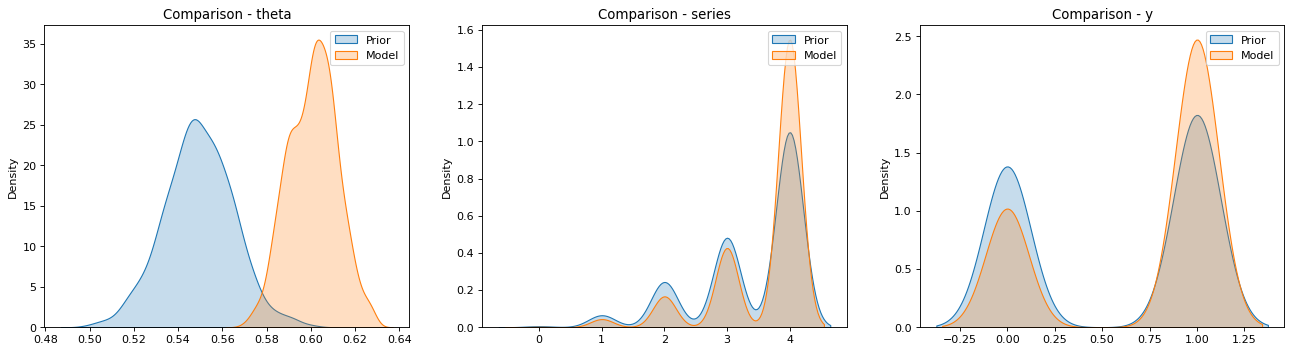

In [76]:
figure(figsize=(20, 5), dpi=80)

plt.subplot(1, 3, 1)
sns.kdeplot(theta_1_prior, shade = True)
sns.kdeplot(theta_1_model, shade = True)
plt.title('Comparison - theta')
plt.legend(['Prior', 'Model'])

plt.subplot(1, 3, 2)
sns.kdeplot(series_1_prior, shade = True)
sns.kdeplot(series_1_model, shade = True)
plt.title('Comparison - series')
plt.legend(['Prior', 'Model'])

plt.subplot(1, 3, 3)
sns.kdeplot(y_1_prior, shade = True)
sns.kdeplot(y_1_model, shade = True)
plt.title('Comparison - y')
plt.legend(['Prior', 'Model'])

### Comments on Posterior Analysis on Model 1

From the graphs and table of summary shown above, we can see that:

- After adding the data of Stephen Curry career stats, the parameter (theta) shifted to the right has the mean value of 0.599

- The number of times Stephen Curry won 4 games in a series has increased up to around 700 which also means he won 700 series out of 1000

- Mean value of y is 0.71 therefore, we can say that the chance of Stephen Curry winning this championship is 71%

## Prior Predictive Check - Model 2
```α, alpha```
- This parameter will be the first argument of theta's beta distribution function

- Normal distribution will be used as the prior for this parameter

- According to the model 1 posterior analysis, the winning percentage is around 60% which is 600 games in our games

- Therefore, we will put the same 550 as the mu argument and 80 as the sigma argument in the normal distribution

```β ,beta```
- This parameter will be the second argument of theta's beta distribution function

- Normal distribution will be used as the prior for this parameter

- And, we put 450 as the mu argument and same 80 as the sigma argument in the normal distribution

```θ, theta```
- This parameter will remain the same as Model 1 but instead of fixed value α = 550 and β = 450

- We put the α and β parameters as the arguments this time

In [84]:
with open ('model_2_ppc.stan', 'r') as file:
    print(file.read())

generated quantities {
   real alpha = normal_rng(550,50);
   real beta = normal_rng(450,50);
   real theta = beta_rng(alpha, beta);
   real series = binomial_rng(7, theta);
   real y;
   if (series >= 4.0){
      series = 4;
      y = 1;
   }
   else
      y = 0;
}


In [79]:
model_2_ppc = CmdStanModel(stan_file='model_2_ppc.stan')

model_2_ppc_result = model_2_ppc.sample(iter_sampling=1000,
                        iter_warmup=0,
                        chains=1,
                        fixed_param=True)

model_2_ppc_result.summary()

INFO:cmdstanpy:compiling stan file /Users/toh/AGH University/2nd - cycle/1st semester/Data_Analytics_2022_Project/model_2_ppc.stan to exe file /Users/toh/AGH University/2nd - cycle/1st semester/Data_Analytics_2022_Project/model_2_ppc
INFO:cmdstanpy:compiled model executable: /Users/toh/AGH University/2nd - cycle/1st semester/Data_Analytics_2022_Project/model_2_ppc
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.00,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN
alpha,550.00,1.5000,48.00,460.00,550.00,630.00,1000.0,200000.0,1.0
beta,450.00,1.7000,52.00,370.00,450.00,530.00,980.0,200000.0,1.0
theta,0.55,0.0012,0.04,0.49,0.55,0.61,1000.0,210000.0,1.0
series,3.30,0.0270,0.89,1.00,4.00,4.00,1100.0,220000.0,1.0
y,0.57,0.0170,0.49,0.00,1.00,1.00,870.0,170000.0,1.0


Text(0.5, 1.0, 'y_2_prior')

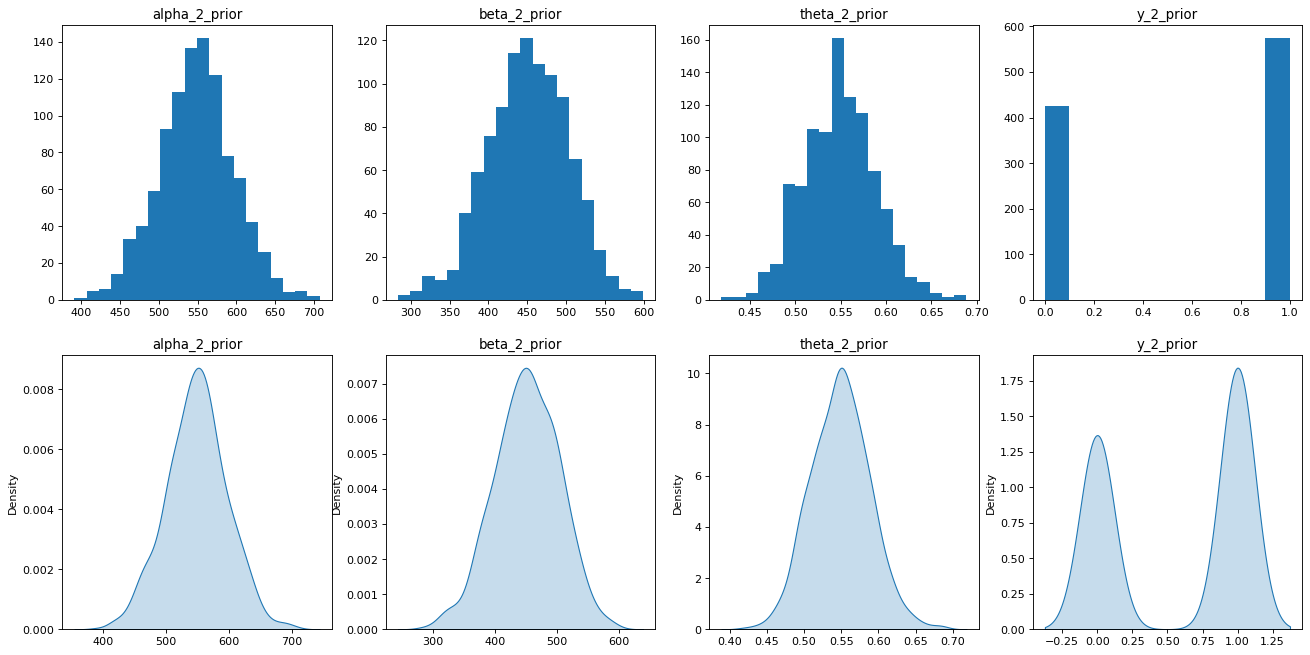

In [80]:
alpha_2_prior = model_2_ppc_result.stan_variable('alpha')
beta_2_prior = model_2_ppc_result.stan_variable('beta')
theta_2_prior = model_2_ppc_result.stan_variable('theta')
y_2_prior = model_2_ppc_result.stan_variable('y')

figure(figsize=(20, 10), dpi=80)

plt.subplot(2, 4, 1)
plt.hist(alpha_2_prior, bins = 20)
plt.title('alpha_2_prior')

plt.subplot(2, 4, 2)
plt.hist(beta_2_prior, bins = 20)
plt.title('beta_2_prior')

plt.subplot(2, 4, 3)
plt.hist(theta_2_prior, bins = 20)
plt.title('theta_2_prior')

plt.subplot(2, 4, 4)
plt.hist(y_2_prior, bins = 10)
plt.title('y_2_prior')

plt.subplot(2, 4, 5)
sns.kdeplot(alpha_2_prior, shade = True)
plt.title('alpha_2_prior')

plt.subplot(2, 4, 6)
sns.kdeplot(beta_2_prior, shade = True)
plt.title('beta_2_prior')

plt.subplot(2, 4, 7)
sns.kdeplot(theta_2_prior, shade = True)
plt.title('theta_2_prior')

plt.subplot(2, 4, 8)
sns.kdeplot(y_2_prior, shade = True)
plt.title('y_2_prior')

### Comments on Prior Predictive Check for Model 2

From the graphs and table of summary shown above, we can see that:

- the parameter (theta) that is simulated from the prior we selected has the mean of 0.55, it makes sense as we put the mean of alpha is 550 and mean of beta is 450 

- the measurement (y) that is simulated from the prior we selected, we can see that Stephen Curry won more series than lost out of 1000 simulated series, higher density in winning (1) than losing (0) with the mean value of y_2_prior is 0.57 which is the same as y_1_prior in model 1

## Posterior Analysis - Model 2

In [81]:
model_2 = CmdStanModel(stan_file = 'model_2.stan')
model_2_fit = model_2.sample(data = {'N': len(Curry_Career_Record), 
                                    'game': Curry_Career_Record}, 
                                    iter_sampling=1000,
                                    iter_warmup=1000,
                                    chains=1,
                                    fixed_param=False)    

model_2_fit.summary()                                    

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-580.00,0.05700,1.100,-590.00,-580.00,-580.00,390.0,13000.0,1.0
alpha,600.00,1.70000,41.000,540.00,610.00,670.00,580.0,20000.0,1.0
beta,360.00,1.40000,33.000,310.00,360.00,420.00,540.0,19000.0,1.0
theta,0.64,0.00063,0.015,0.62,0.64,0.67,570.0,20000.0,1.0
y,0.79,0.01300,0.400,0.00,1.00,1.00,950.0,33000.0,1.0
series,3.70,0.02100,0.640,2.00,4.00,4.00,910.0,31000.0,1.0


Text(0.5, 1.0, 'y_2_model')

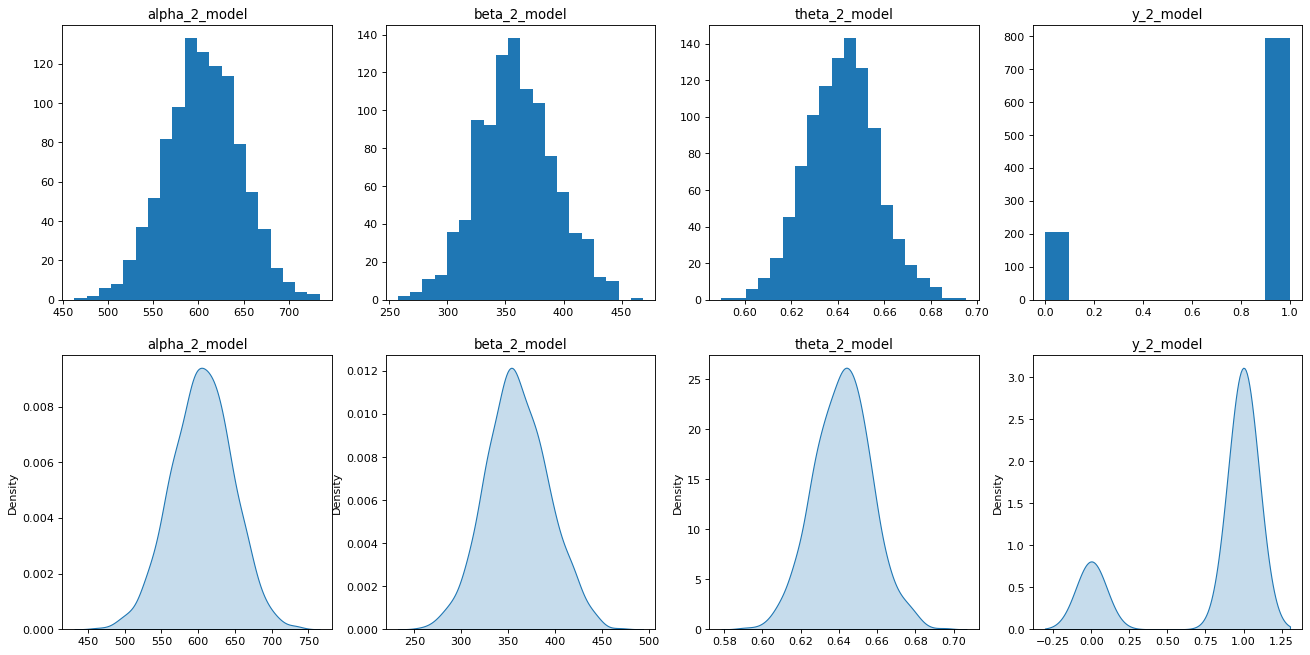

In [82]:
alpha_2_model = model_2_fit.stan_variable('alpha')
beta_2_model = model_2_fit.stan_variable('beta')
theta_2_model = model_2_fit.stan_variable('theta')
y_2_model = model_2_fit.stan_variable('y')

figure(figsize=(20, 10), dpi=80)

plt.subplot(2, 4, 1)
plt.hist(alpha_2_model, bins = 20)
plt.title('alpha_2_model')

plt.subplot(2, 4, 2)
plt.hist(beta_2_model, bins = 20)
plt.title('beta_2_model')

plt.subplot(2, 4, 3)
plt.hist(theta_2_model, bins = 20)
plt.title('theta_2_model')

plt.subplot(2, 4, 4)
plt.hist(y_2_model, bins = 10)
plt.title('y_2_model')

plt.subplot(2, 4, 5)
sns.kdeplot(alpha_2_model, shade = True)
plt.title('alpha_2_model')

plt.subplot(2, 4, 6)
sns.kdeplot(beta_2_model, shade = True)
plt.title('beta_2_model')

plt.subplot(2, 4, 7)
sns.kdeplot(theta_2_model, shade = True)
plt.title('theta_2_model')

plt.subplot(2, 4, 8)
sns.kdeplot(y_2_model, shade = True)
plt.title('y_2_model')

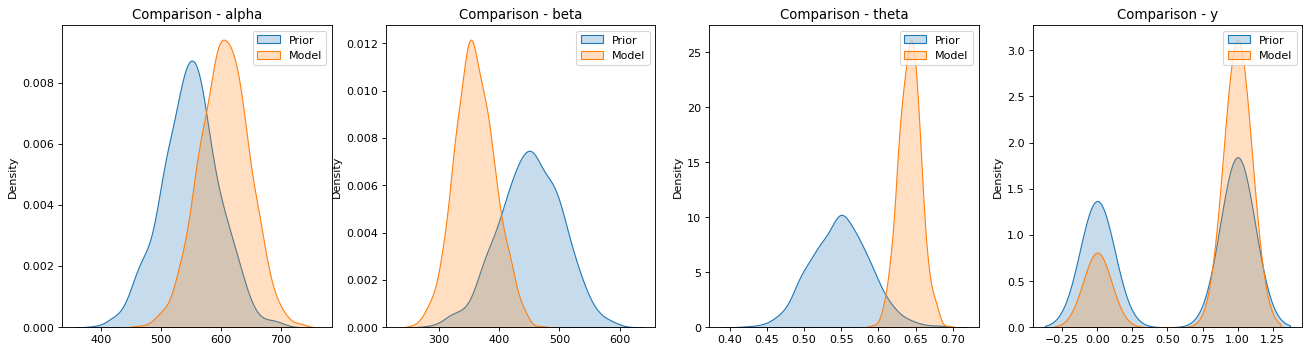

In [83]:
figure(figsize=(20, 5), dpi=80)

plt.subplot(1, 4, 1)
sns.kdeplot(alpha_2_prior, shade = True)
sns.kdeplot(alpha_2_model, shade = True)
plt.title('Comparison - alpha')
plt.legend(['Prior', 'Model'])

plt.subplot(1, 4, 2)
sns.kdeplot(beta_2_prior, shade = True)
sns.kdeplot(beta_2_model, shade = True)
plt.title('Comparison - beta')
plt.legend(['Prior', 'Model'])

plt.subplot(1, 4, 3)
sns.kdeplot(theta_2_prior, shade = True)
sns.kdeplot(theta_2_model, shade = True)
plt.title('Comparison - theta')
plt.legend(['Prior', 'Model'])

plt.subplot(1, 4, 4)
sns.kdeplot(y_2_prior, shade = True)
sns.kdeplot(y_2_model, shade = True)
plt.title('Comparison - y')
plt.legend(['Prior', 'Model'])

### Comments on Posterior Analysis on Model 2

From the graphs and table of summary shown above, we can see that:

- After adding the data of Stephen Curry career stats, the parameter (theta) shifted to the right has the mean value of 0.64

- The number of times Stephen Curry won a series has increased up to around 800 out of 1000 series

- Mean value of y is 0.79 therefore, we can say that the chance of Stephen Curry winning this championship is 79%

### Comments on both models Posterior Analysis
- The data we inserted for both models are the same but the results are different

- This is because we added additional two parameters (α, β) for model 2

- These two parameters are the arguments of θ which is the chance of Stephen Curry winning one game

- And this will affect the number of games he will win in a series and winning a series

## Model comparison

In [91]:
arviz_model_1 = az.from_cmdstanpy(
    posterior=model_1_fit,
    posterior_predictive=["y", "series"],
    log_likelihood="y",
    observed_data={"y": Curry_Career_Record},
)

arviz_model_2 = az.from_cmdstanpy(
    posterior=model_2_fit,
    posterior_predictive=["y", "series"],
    log_likelihood="y",
    observed_data={"y": Curry_Career_Record},
)

/Library/Anaconda/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
/Library/Anaconda/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:1421: UserWarning: The point-wise WAIC is the same with the sum WAIC, please double check
            the Observed RV in your model to make sure it returns element-wise logp.
            
  warnings.warn(
/Library/Anaconda/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale)])
/Library/Anaconda/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:1421: UserWarning: The point-wise WAIC is the same with the sum WAIC, please double check
            the Observed RV in your model to make 

<AxesSubplot:xlabel='Log'>

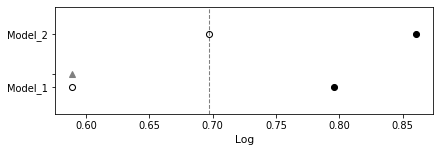

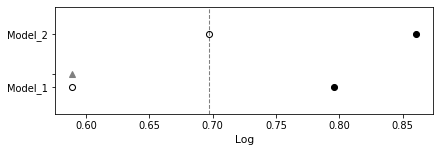

In [92]:
dict = {'Model_1': arviz_model_1,'Model_2': arviz_model_2}
comparison_waic = az.compare(dict, ic = 'waic')
az.plot_compare(comparison_waic)
comparison_loo = az.compare(dict, ic = 'loo')
az.plot_compare(comparison_waic)